In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
freight_data = pd.read_csv('freight_dataset.csv')

In [3]:
freight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         32951 non-null  object 
 1   product_weight_g   32949 non-null  float64
 2   product_length_cm  32949 non-null  float64
 3   product_height_cm  32949 non-null  float64
 4   product_width_cm   32949 non-null  float64
 5   freight_value      32951 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.5+ MB


In [4]:
freight_data.isna().sum()

product_id           0
product_weight_g     2
product_length_cm    2
product_height_cm    2
product_width_cm     2
freight_value        0
dtype: int64

In [5]:
freight_data = freight_data.dropna()

In [6]:
freight_data = freight_data.drop(columns=['product_id'])

In [7]:
freight_data.head()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,freight_value
0,650.0,28.0,9.0,14.0,13.29
1,30000.0,50.0,30.0,40.0,19.93
2,3050.0,33.0,13.0,33.0,17.87
3,200.0,16.0,10.0,15.0,12.79
4,3750.0,35.0,40.0,30.0,18.14


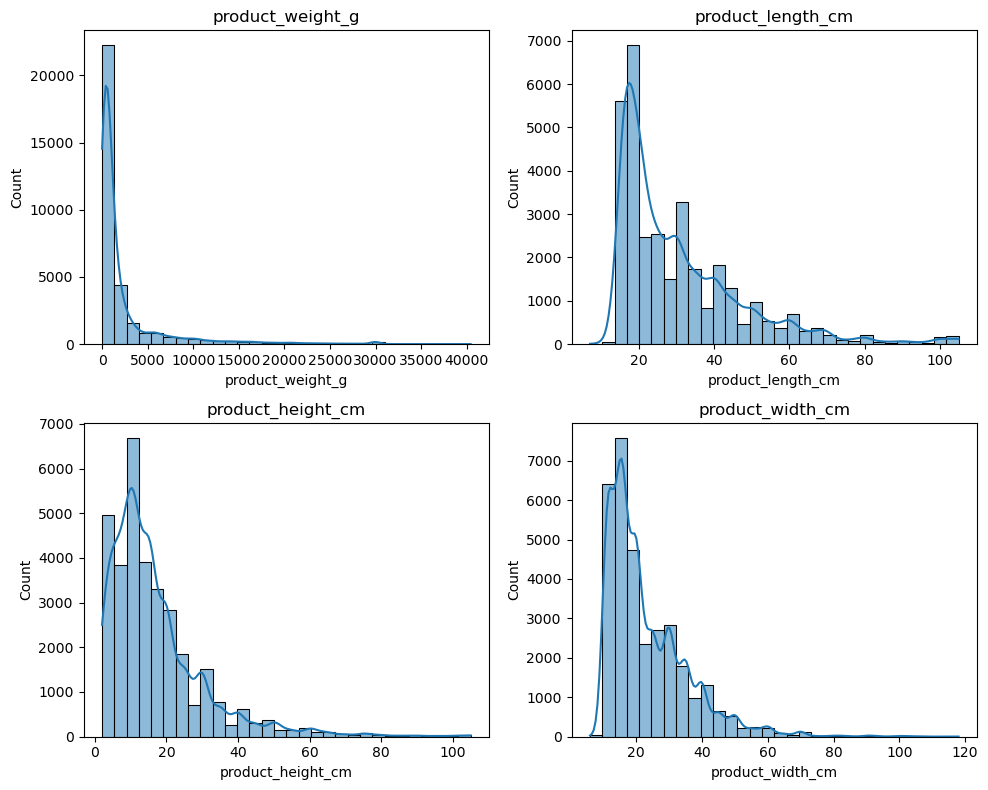

In [8]:
import warnings

warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")
# Histograms for key features

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for i, col in enumerate(columns):
    sns.histplot(freight_data[col], kde=True, ax=axes[i//2, i%2], bins=30)
    axes[i//2, i%2].set_title(col)
plt.tight_layout()
plt.show()


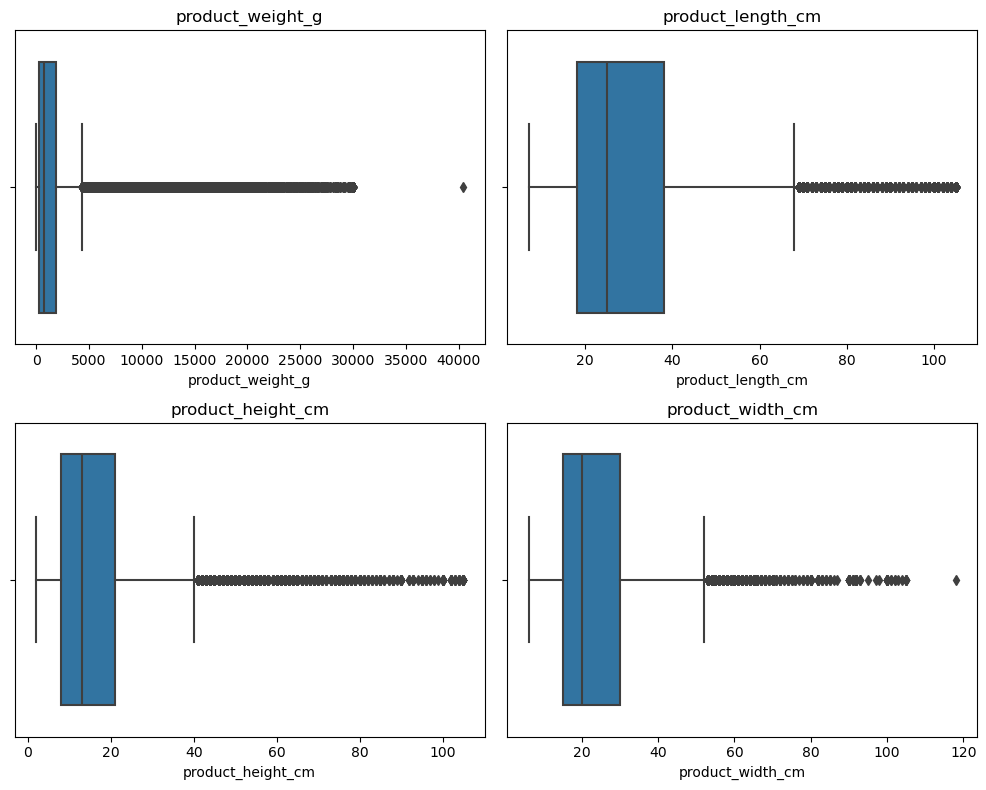

In [9]:
# Example: Box plots for key features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i, col in enumerate(columns):
    sns.boxplot(x=freight_data[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
plt.tight_layout()
plt.show()

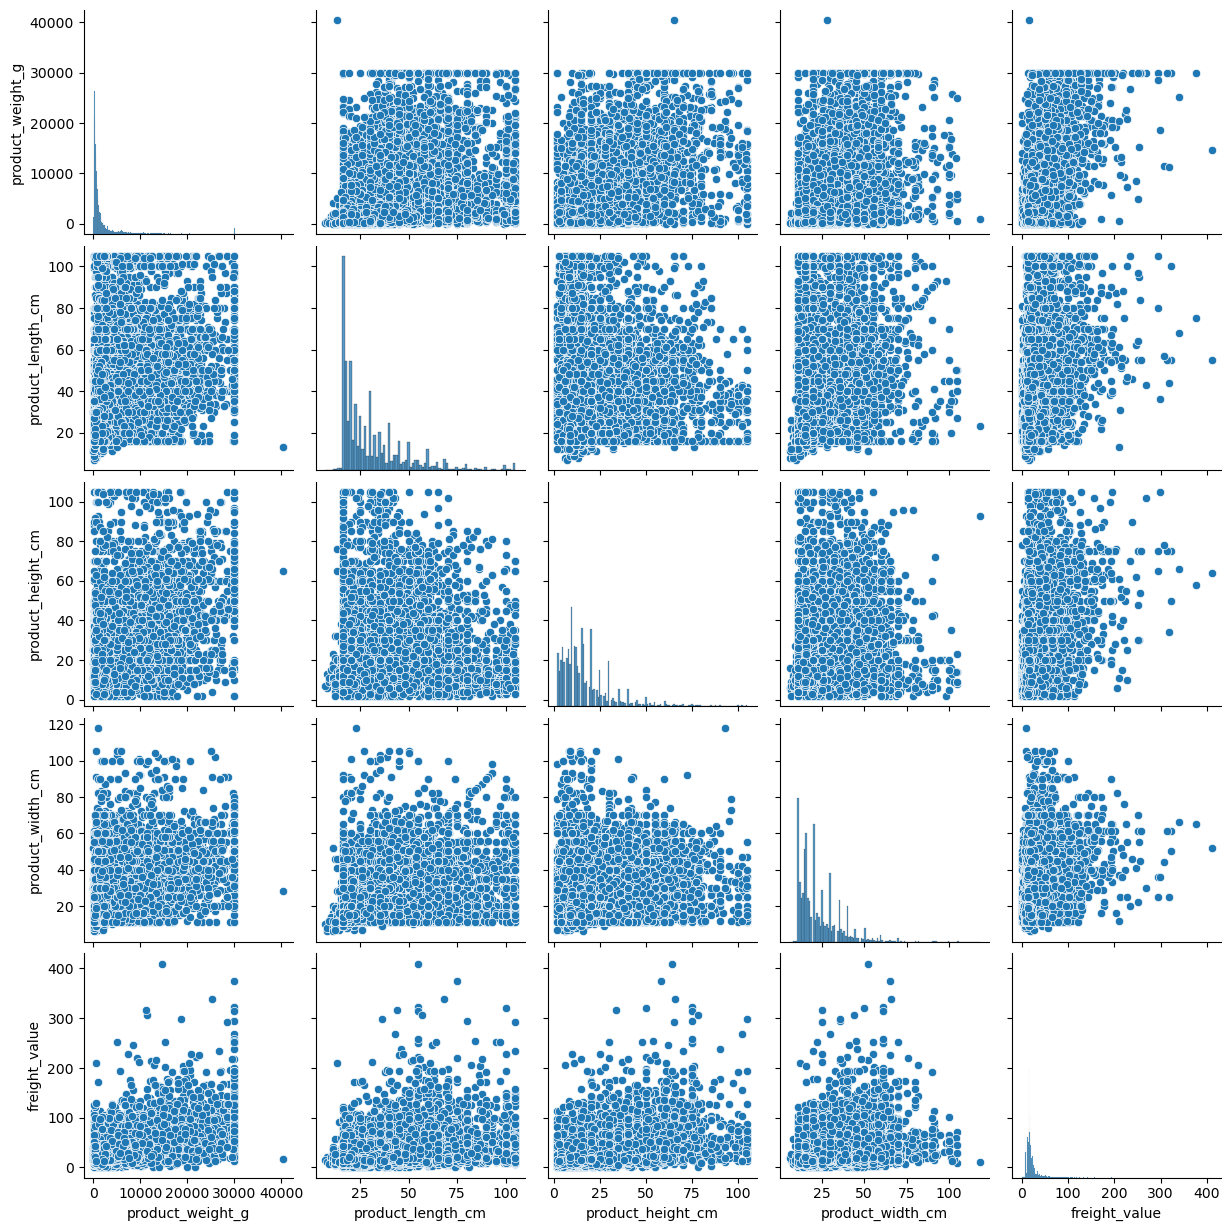

In [10]:
# Example: Pair plot of features
sns.pairplot(freight_data[columns + ['freight_value']])
plt.show()

In [15]:
freight_data.corr()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,freight_value
product_weight_g,1.000000,0.476813,0.563910,0.527597,0.635554
product_length_cm,0.476813,1.000000,0.204889,0.542409,0.351902
product_height_cm,0.563910,0.204889,1.000000,0.313491,0.422435
product_width_cm,0.527597,0.542409,0.313491,1.000000,0.372714
freight_value,0.635554,0.351902,0.422435,0.372714,1.000000


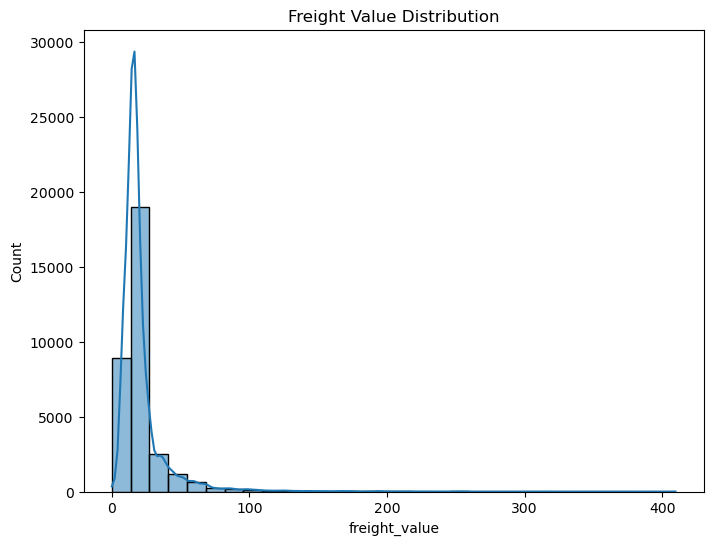

In [16]:
# Example: Histogram of freight value
plt.figure(figsize=(8, 6))
sns.histplot(freight_data['freight_value'], kde=True, bins=30)
plt.title('Freight Value Distribution')
plt.show()